<a href="https://colab.research.google.com/github/Adjaro/Adjaro/blob/main/Deep_Neural_Network_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Méthode 1

# Importation, analyse et visualisation initiale de Dataset

**1.Importation de libreries**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

nous avons remarqué que notre dataset contient le mot 'unknown' qui veut dire inconue ce qui est qualifié comme valeurs manquantes en générale sauf s il avait une designiation bien precise selon le langage de l'entreprise. Pour cette raison nous avons utilisé "na_values =['unknown']"

**2.Chargement du dataset**

In [ ]:
import pandas as pd
df= pd.read_csv("bank.csv", sep=",",na_values =['unknown'])
df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,yes
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,yes
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,yes
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,yes
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,yes


**3.Analyse et visualisation initial**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11092 non-null  object
 2   marital    11162 non-null  object
 3   education  10665 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    8816 non-null   object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   2836 non-null   object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.isnull().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

Aprés exploration de notre dataset: on a 17 collones sur 11162 lignes, avec 7 colones int64 et 10 colonnes object

# Nettoyer les données

In [ ]:
#separer bank_data en deux dataframe une contient les colonnes 'numeric' et l'autre les colones 'object'
df_num = df.select_dtypes(exclude=['object'])
df_obj = df.select_dtypes(include=['object'])


In [ ]:
print("colonnes numériques")
df_num.head()

colonnes numériques


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [ ]:
print("colonnes categoriales")
df_obj.head()

colonnes categoriales


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,NaN,may,NaN,yes
1,admin.,married,secondary,no,no,no,NaN,may,NaN,yes
2,technician,married,secondary,no,yes,no,NaN,may,NaN,yes
3,services,married,secondary,no,yes,no,NaN,may,NaN,yes
4,admin.,married,tertiary,no,no,no,NaN,may,NaN,yes


In [ ]:
#Enoding de df_obj en préservant les valeurs NaN
df_obj_temp = df_obj.astype("str").apply(LabelEncoder().fit_transform)
df_obj_final = df_obj_temp.where(~df_obj.isna(), df_obj)
df_obj_final
df_obj_final.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,0,1,2,0,1,0,NaN,8,NaN,1
1,0,1,2,0,0,0,NaN,8,NaN,1
2,10,1,2,0,1,0,NaN,8,NaN,1
3,8,1,2,0,1,0,NaN,8,NaN,1
4,0,1,3,0,0,0,NaN,8,NaN,1


In [ ]:
#remplissage des NaN de chaque colones par la moyenne du meme colone
for val in df_obj.columns:
  df_obj_final[val].fillna(df_obj_final[val].mean(), inplace=True)
df_obj_final.head()  

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,0.0,1,2.0,0,1,0,0.17559,8,1.511636,1
1,0.0,1,2.0,0,0,0,0.17559,8,1.511636,1
2,10.0,1,2.0,0,1,0,0.17559,8,1.511636,1
3,8.0,1,2.0,0,1,0,0.17559,8,1.511636,1
4,0.0,1,3.0,0,0,0,0.17559,8,1.511636,1


In [ ]:
#concaténer à nouveau df_obj et df_num
bank_data = pd.concat([df_num,df_obj_final], axis=1)
bank_data = bank_data[list(df.columns)]
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0.0,1,2.0,0,2343,1,0,0.17559,5,8,1042,1,-1,0,1.511636,1
1,56,0.0,1,2.0,0,45,0,0,0.17559,5,8,1467,1,-1,0,1.511636,1
2,41,10.0,1,2.0,0,1270,1,0,0.17559,5,8,1389,1,-1,0,1.511636,1
3,55,8.0,1,2.0,0,2476,1,0,0.17559,5,8,579,1,-1,0,1.511636,1
4,54,0.0,1,3.0,0,184,0,0,0.17559,5,8,673,2,-1,0,1.511636,1


# Réseau d'apprentissage en profondeur-prédiction ("dépôt" soit no ou yes)

**1.Préparation des Input**

In [ ]:
#transfor our data to numpy
np_bank = bank_data.to_numpy()
print('data sous forme array.')
np_bank[:5:]

data sous forme array.


array([[ 5.90000000e+01,  0.00000000e+00,  1.00000000e+00,
         2.00000000e+00,  0.00000000e+00,  2.34300000e+03,
         1.00000000e+00,  0.00000000e+00,  1.75589837e-01,
         5.00000000e+00,  8.00000000e+00,  1.04200000e+03,
         1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
         1.51163611e+00,  1.00000000e+00],
       [ 5.60000000e+01,  0.00000000e+00,  1.00000000e+00,
         2.00000000e+00,  0.00000000e+00,  4.50000000e+01,
         0.00000000e+00,  0.00000000e+00,  1.75589837e-01,
         5.00000000e+00,  8.00000000e+00,  1.46700000e+03,
         1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
         1.51163611e+00,  1.00000000e+00],
       [ 4.10000000e+01,  1.00000000e+01,  1.00000000e+00,
         2.00000000e+00,  0.00000000e+00,  1.27000000e+03,
         1.00000000e+00,  0.00000000e+00,  1.75589837e-01,
         5.00000000e+00,  8.00000000e+00,  1.38900000e+03,
         1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
         1.51163611e+00,  1.0

In [ ]:
#Separate feature and target variables
X_data = np_bank[:,0:16]
Y_data=np_bank[:,16]

print('feature avant standarisation et targuet avant one-hot-encoding.')
X_data[:5,:], Y_data[:5]

feature avant standarisation et targuet avant one-hot-encoding.


(array([[ 5.90000000e+01,  0.00000000e+00,  1.00000000e+00,
          2.00000000e+00,  0.00000000e+00,  2.34300000e+03,
          1.00000000e+00,  0.00000000e+00,  1.75589837e-01,
          5.00000000e+00,  8.00000000e+00,  1.04200000e+03,
          1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
          1.51163611e+00],
        [ 5.60000000e+01,  0.00000000e+00,  1.00000000e+00,
          2.00000000e+00,  0.00000000e+00,  4.50000000e+01,
          0.00000000e+00,  0.00000000e+00,  1.75589837e-01,
          5.00000000e+00,  8.00000000e+00,  1.46700000e+03,
          1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
          1.51163611e+00],
        [ 4.10000000e+01,  1.00000000e+01,  1.00000000e+00,
          2.00000000e+00,  0.00000000e+00,  1.27000000e+03,
          1.00000000e+00,  0.00000000e+00,  1.75589837e-01,
          5.00000000e+00,  8.00000000e+00,  1.38900000e+03,
          1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
          1.51163611e+00],
        [ 5.5000000

In [ ]:
#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)
#Scale the numeric feature variables
X_data = scaler.transform(X_data)
#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,2)

print('feature aprés standarisation et targuet aprés one-hot-encoding.')
X_data[:5,:], Y_data[:5,:]

feature aprés standarisation et targuet aprés one-hot-encoding.


(array([[ 1.49150488, -1.34646359, -0.31867191, -0.31497799, -0.12361659,
          0.25252514,  1.05527951, -0.38792323,  0.        , -1.26574556,
          0.80026761,  1.93022589, -0.55416834, -0.48118405, -0.36325984,
          0.        ],
        [ 1.23967567, -1.34646359, -0.31867191, -0.31497799, -0.12361659,
         -0.4599736 , -0.94761624, -0.38792323,  0.        , -1.26574556,
          0.80026761,  3.15461161, -0.55416834, -0.48118405, -0.36325984,
          0.        ],
        [-0.0194704 ,  1.42080974, -0.31867191, -0.31497799, -0.12361659,
         -0.0801603 ,  1.05527951, -0.38792323,  0.        , -1.26574556,
          0.80026761,  2.92990082, -0.55416834, -0.48118405, -0.36325984,
          0.        ],
        [ 1.1557326 ,  0.86735507, -0.31867191, -0.31497799, -0.12361659,
          0.29376202,  1.05527951, -0.38792323,  0.        , -1.26574556,
          0.80026761,  0.59636568, -0.55416834, -0.48118405, -0.36325984,
          0.        ],
        [ 1.07178952

In [ ]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print('Train Test Dimensions.')
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

Train Test Dimensions.
(10045, 16) (10045, 2) (1117, 16) (1117, 2)


**2.Construction du modèle**

In [ ]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(16,)),
  Dense(64, activation='relu'),
  Dense(2, activation='softmax')])

**3.Compilation du modèle**

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                1088      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 2)                 130       
                                                                 
Total params: 5,378
Trainable params: 5,378
Non-trainable params: 0
_________________________________________________________________


**4.Entrainement du modèle**

In [ ]:
history = model.fit(
  X_train,
  Y_train,
  epochs=5,
  batch_size=32,
  validation_data=(X_test, Y_test))

Epoch 1/5
314/314 [==============================] - 1s 3ms/step - loss: 0.4889 - accuracy: 0.7667 - val_loss: 0.4621 - val_accuracy: 0.7825
Epoch 2/5
314/314 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.8053 - val_loss: 0.4528 - val_accuracy: 0.7941
Epoch 3/5
314/314 [==============================] - 1s 2ms/step - loss: 0.4112 - accuracy: 0.8174 - val_loss: 0.4392 - val_accuracy: 0.8030
Epoch 4/5
314/314 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8201 - val_loss: 0.4396 - val_accuracy: 0.7986
Epoch 5/5
314/314 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8240 - val_loss: 0.4373 - val_accuracy: 0.7923


**5.Graphe de Accuracy et loss**

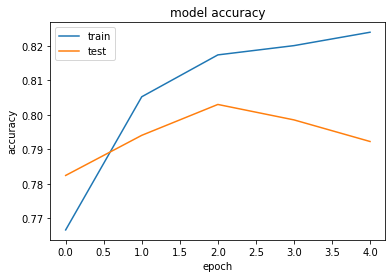

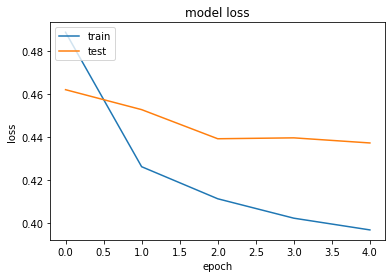

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**6.Evaluation du modèle**

In [ ]:
model.evaluate(X_test, Y_test)

35/35 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7923


[0.4372542202472687, 0.792300820350647]

**7.Enregistrement du modèle**

In [ ]:
model.save("bank_model_deep_learning")
    
#Loading a Model 
from tensorflow import keras
loaded_model = keras.models.load_model("bank_model_deep_learning")

#Print Model Summary
loaded_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                1088      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 2)                 130       
                                                                 
Total params: 5,378
Trainable params: 5,378
Non-trainable params: 0
_________________________________________________________________


**8.Prédection d'une donnée**

In [ ]:
#Raw prediction data
prediction_input = [[20., 1., 0., 1., 0., 2343., 1., 1., 2., 5., 8., 1042.,0.,-1., 0., 2.]]
#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
prediction

1/1 [==============================] - 0s 53ms/step
Raw Prediction Output (Probabilities) : [[0.0556087 0.9443913]]


1

**ASTUCE**

In [ ]:
#detecter les prediction possible avec leur encoding
#transfor our data to numpy
one_hot=pd.get_dummies(df['deposit'])
df = df.join(one_hot)
df.drop(df.columns[0:17], axis=1, inplace=True)

In [ ]:
df.head(1)

,no,yes
0,0,1


In [ ]:
print(list(df.columns))
print(df.loc[1, :].values.tolist())

['no', 'yes']
[0, 1]


In [ ]:
#crer un dictionnaire
key_list = list(df.columns)
value_list = df.loc[1, :].values.tolist()

dict_from_list = {}
for key in key_list:
  for value in value_list:
    dict_from_list[key] = value
    value_list.remove(value)
    break

print(dict_from_list)

{'no': 0, 'yes': 1}


In [ ]:
for key, val in dict_from_list.items():   
  if prediction == val:
    print(f'Prediction is {[key]}' )

Prediction is ['yes']


**Exercice à résoudre**

Reamarque: en cas ou les labels sont nombreux on aura besoin de ce dernier code pour citer toute les predictions possibles car dans ce cas de concatenation on ne peut pas rappeller la focntion, encod.inverse car on a entrainer le modéle sur une dataframe concaténé apres preprocessing apres separation du data original en deux dataframe
ie impossible de les retrouver
```
print("Prediction is ", encoder.inverse_transform([prediction])) ?????
```

Pour cela il faut reecuperer l'encodage exacte en utilisant cette astuce en haut


```

```



Methode 2
[texte du lien](https://colab.research.google.com/drive/1Az_cLUgIckt5L338SreD7WvmptyhDe7U?usp=sharing)

Méthode 3 [texte du lien](https://colab.research.google.com/drive/195Y9zuyEc9Abaxs4iPI6fJV81uB7i08a?usp=sharing)

        un petit souci à résoudre lors du remplissage de la colonne 'poutcome'

Méthode 4 [texte du lien](https://colab.research.google.com/drive/1aHNjzBCPL9NJ0fgodAYEffOxv3G-t8qE?usp=sharing)